## Amazon.com - Employee Access Challenge

In [ ]:
!pip install pyforest
from pyforest import*
lazy_imports()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['from openpyxl import load_workbook',
 'import fastai',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from pathlib import Path',
 'from sklearn.decomposition import PCA',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.ensemble import RandomForestClassifier',
 'import tensorflow as tf',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import sklearn',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.model_selection import StratifiedKFold',
 'import re',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.linear_model import Ridge',
 'import matplotlib as mpl',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import fbprophet',
 'from sklearn import svm',
 'import plotly.express as px',
 'from fbprophet import Prophet',
 'from sklearn.preprocessing import OneHotEncoder',
 'import awswrangler as w

In [ ]:
train = pd.read_csv("/content/amazonTrain.csv")

<IPython.core.display.Javascript object>

In [ ]:
test = pd.read_csv("/content/amazonTest.csv")

<IPython.core.display.Javascript object>

In [ ]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
train.shape

(32769, 10)

In [ ]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [ ]:
test.shape

(58921, 10)


#### **CatBoost**



CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.


Procedure for other gradient boosting algorithms (XG boost, Light GBM)
Step 1: Consider all (or a sample ) the data points to train a highly biased model.

Step 2: Calculate residuals (errors) for each data point.

Step 3: Train another model with the same data points and corresponding residuals (errors) as class labels.

Step 4: Repeat Step 2 & Step 3 ( for n iterations).

This procedure is prone to overfitting, because we are calculating residuals of each data point by using the model that has already been trained on same set of data points.

<br>

**Advantages of CatBoost Library**

**Performance:**

CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.

**Handling Categorical features automatically:**

We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.

**Robust:**

It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. You can read about all these parameters here.

**Easy-to-use:** You can use CatBoost from the command line, using an user-friendly API for both Python and R.


*Reference for Gradient Boosting* : https://bit.ly/2LOJQYD

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.6 MB/s eta 0:00:00


In [ ]:
# Loading data directly from CatBoost
from catboost.datasets import amazon
traindf, testdf = amazon()

In [ ]:
traindf.shape

(32769, 10)

In [ ]:
testdf.shape

(58921, 10)

In [ ]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


**ACTION** is our target column

In [ ]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [ ]:
traindf.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [ ]:
traindf['MGR_ID'].value_counts()

770       152
2270       99
2594       82
1350       71
2014       67
16850      66
3966       64
7807       64
5244       62
5396       62
3526       62
4659       61
7411       61
54618      61
18686      60
7578       58
7389       58
3281       57
70062      57
18213      57
6982       56
1475       56
71189      55
85475      55
1334       54
3838       54
46254      54
1903       53
1755       53
7553       53
         ... 
50605       1
93720       1
55662       1
53519       1
28225       1
6358        1
20421       1
3285        1
17628       1
64779       1
6030        1
5542        1
311597      1
8047        1
5526        1
5966        1
50604       1
142801      1
7639        1
15651       1
97915       1
58648       1
44633       1
1908        1
73591       1
1940        1
8087        1
22526       1
34948       1
58677       1
Name: MGR_ID, Length: 4243, dtype: int64

#### Distribution of Features

**Histplot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

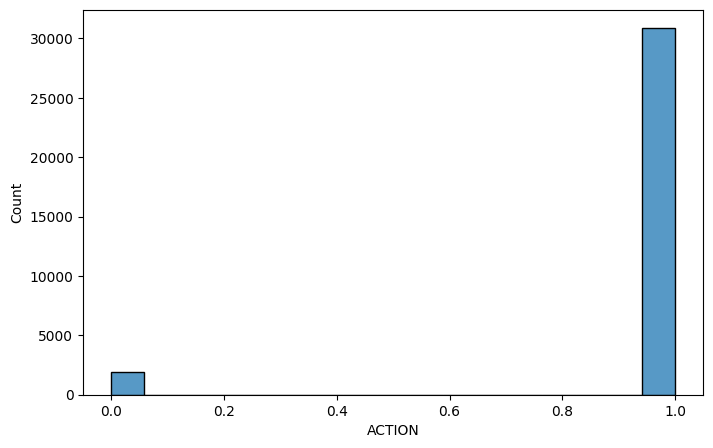

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

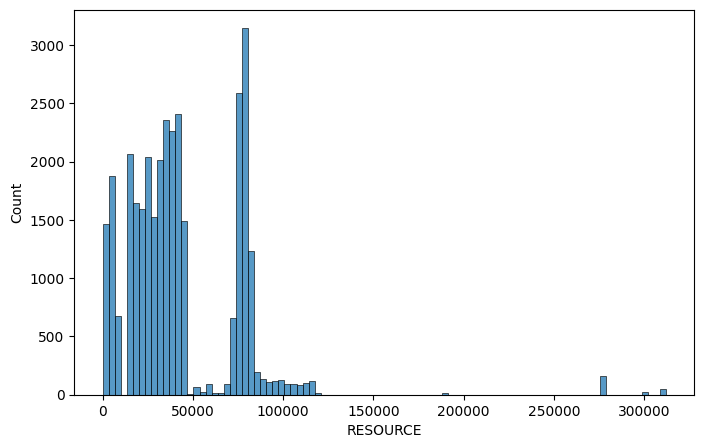

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

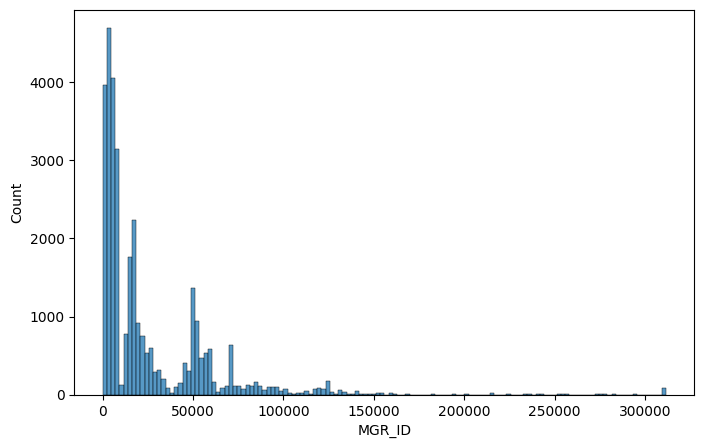

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

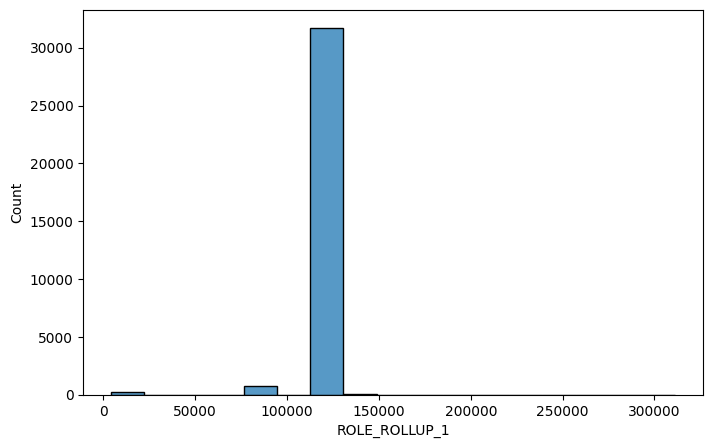

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

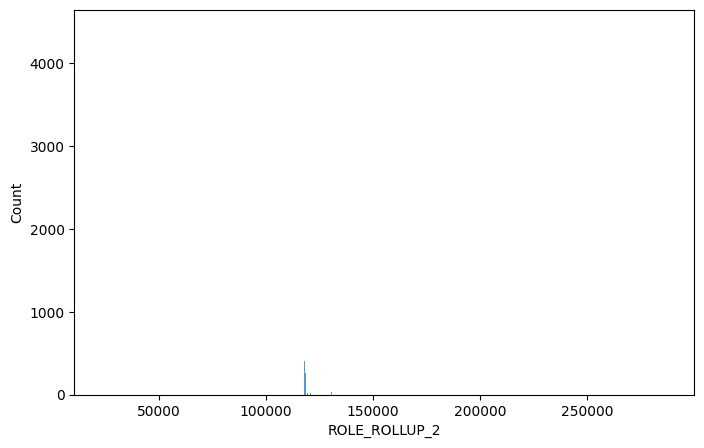

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

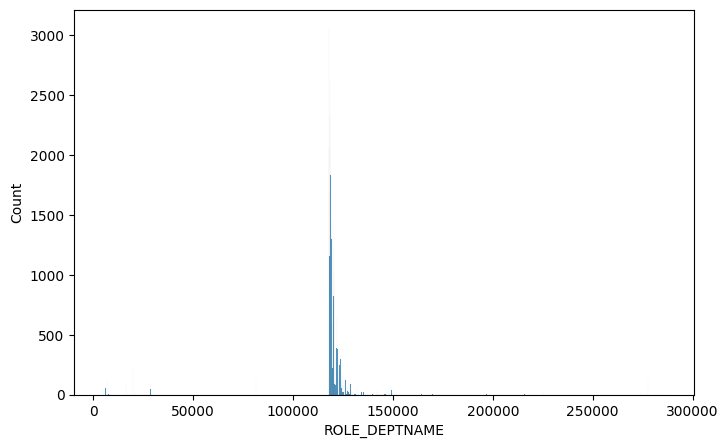

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

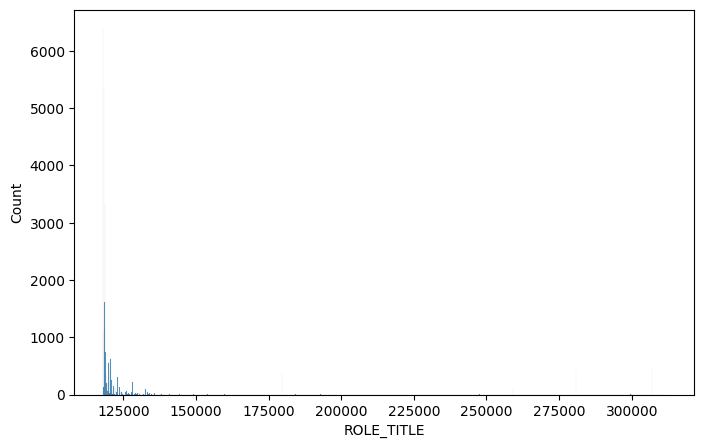

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

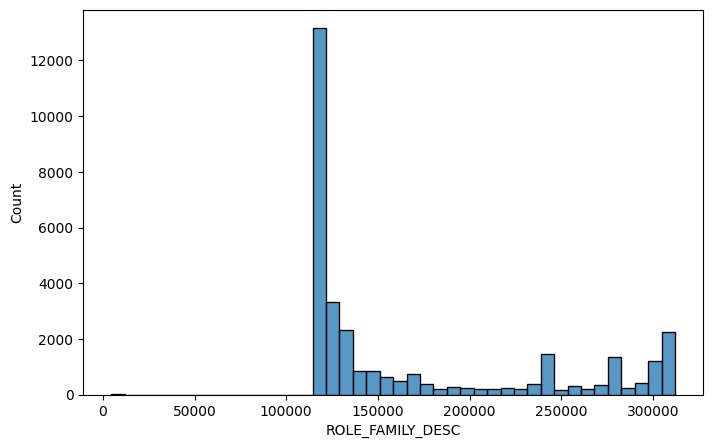

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

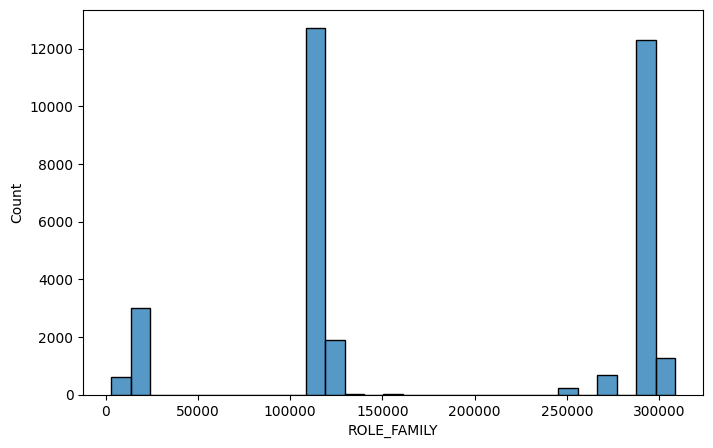

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

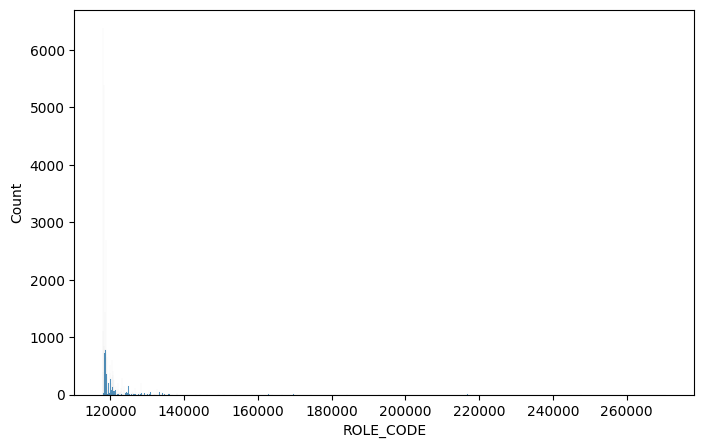

In [ ]:
for i in traindf.describe().columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(traindf[i].dropna())
  print('\n')
  plt.show()

<br>

**Boxplot**

In [ ]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

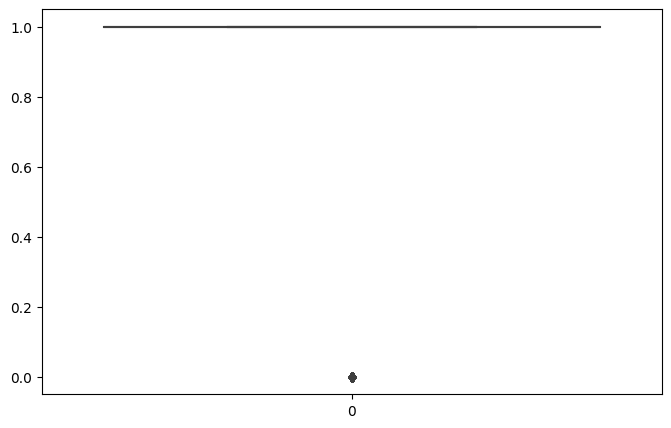

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

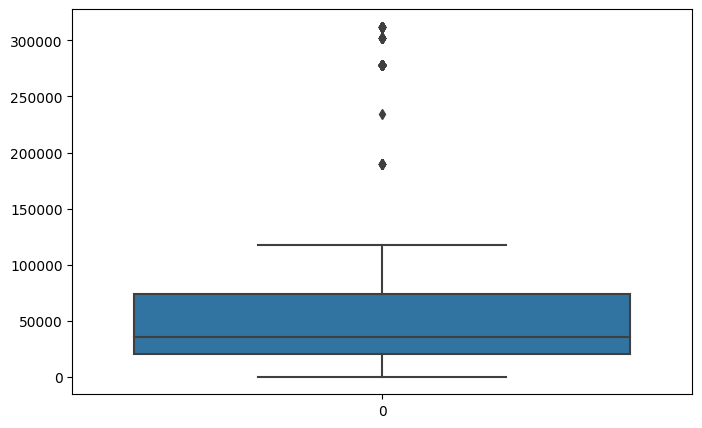

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

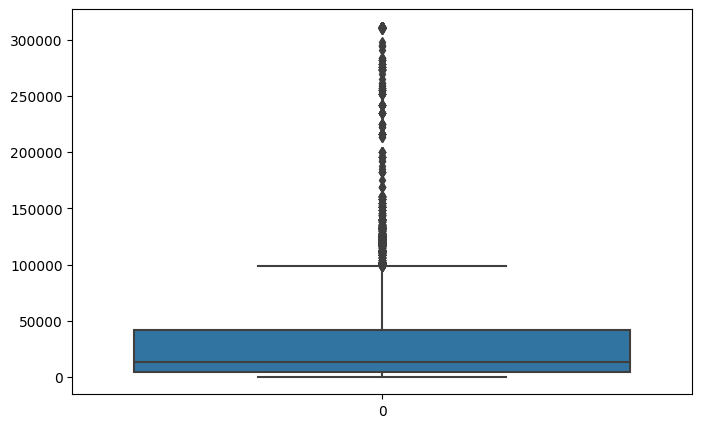

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

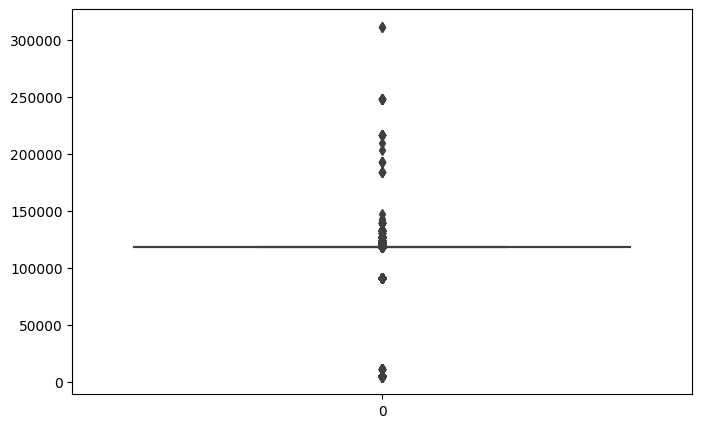

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

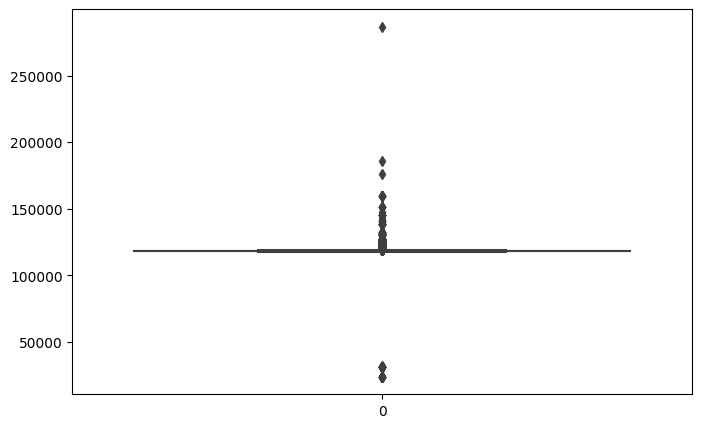

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

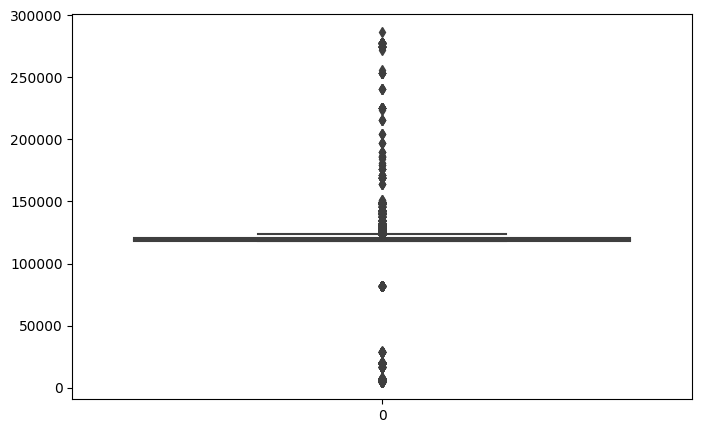

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

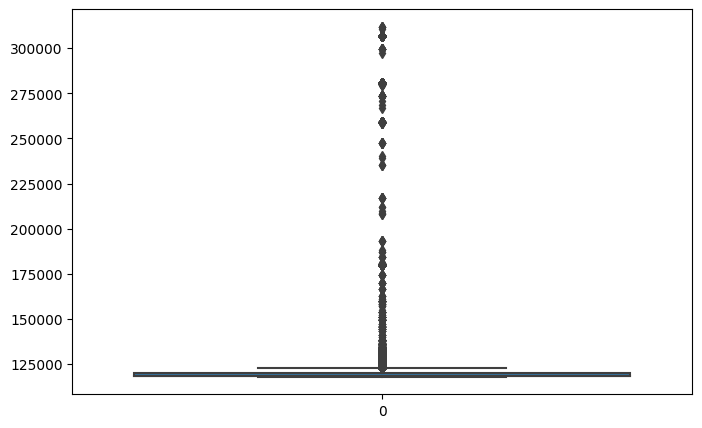

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

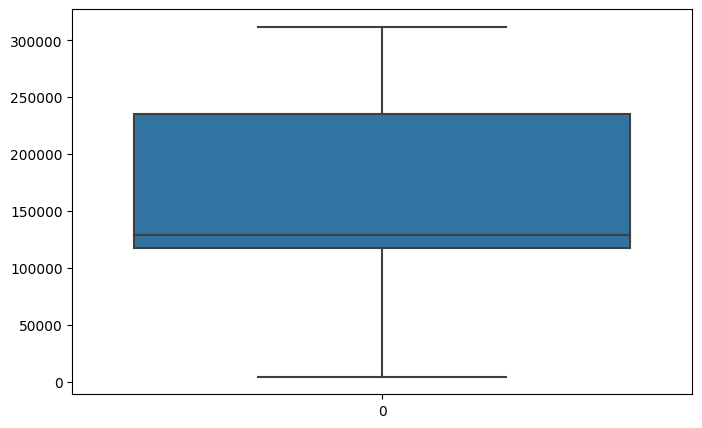

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

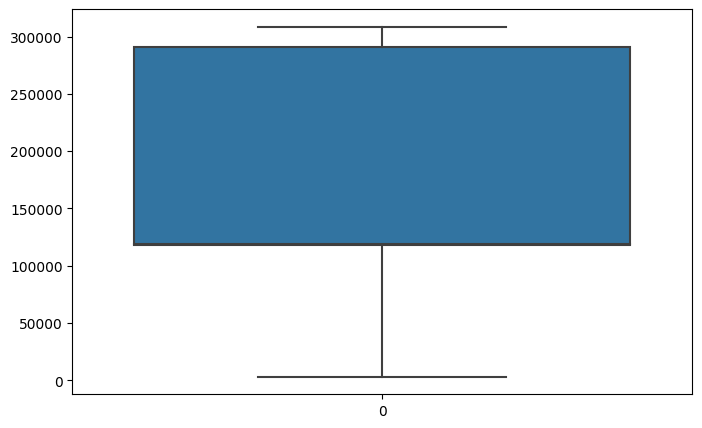

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

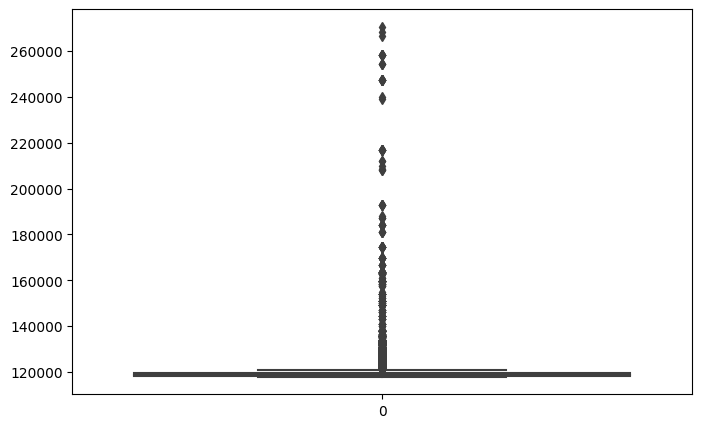

In [ ]:
for i in traindf.describe().columns:
  plt.figure(figsize=(8, 5))
  sns.boxplot(traindf[i].dropna())
  print('\n')
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

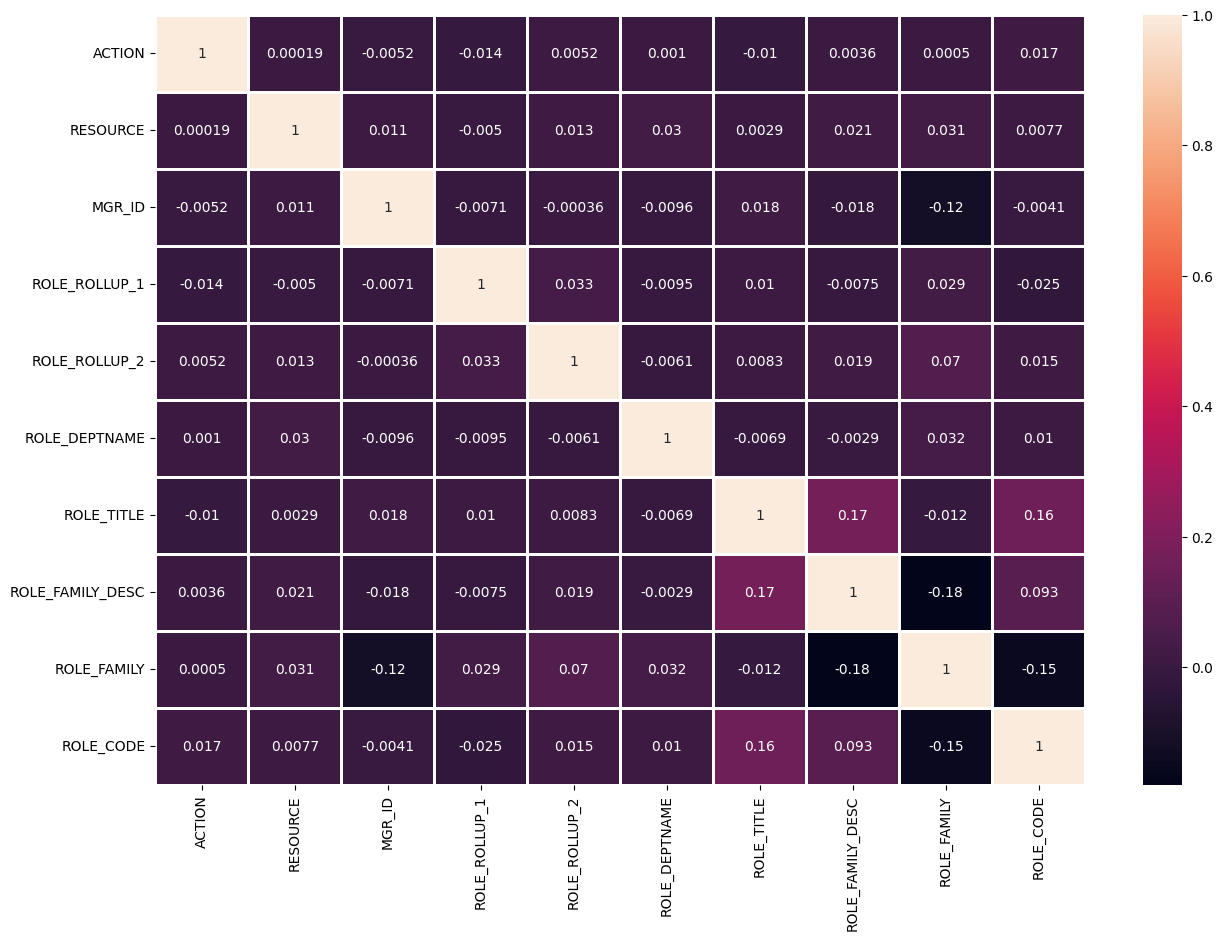

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(traindf.corr(), annot=True, linewidth=1)

In [ ]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


#### Model Building

In [ ]:
X = traindf.drop('ACTION',axis=1)
X_test = testdf.drop('id',axis=1)
y = traindf['ACTION']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
%%time

params = {'loss_function':'Logloss', # Objective function
          'eval_metric':'AUC', # Metric
          'verbose': 200, # Output to stdout info about training process every 200 iterations
          'random_seed': 64
         }
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, # Data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_valid, y_valid), # Data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
         );

Learning rate set to 0.069882
0:	test: 0.5551589	best: 0.5551589 (0)	total: 13.9ms	remaining: 13.9s
200:	test: 0.7934511	best: 0.7934511 (200)	total: 2.16s	remaining: 8.6s
400:	test: 0.8168317	best: 0.8168999 (399)	total: 4.3s	remaining: 6.42s
600:	test: 0.8268451	best: 0.8271279 (598)	total: 8.57s	remaining: 5.69s
800:	test: 0.8346046	best: 0.8346046 (800)	total: 11.5s	remaining: 2.85s
999:	test: 0.8378348	best: 0.8378709 (990)	total: 13.6s	remaining: 0us

bestTest = 0.8378708798
bestIteration = 990

Shrink model to first 991 iterations.
CPU times: user 19.7 s, sys: 1.3 s, total: 21 s
Wall time: 13.8 s


In [ ]:
#catmodel_1.plot_tree(tree_idx=0)

# https://catboost.ai/docs/concepts/python-reference_catboostclassifier_plot_tree.html

In [ ]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
# In the above model CatBoost treated categorical features as numerical ones. Thus, the categories were ranked. We need to specify which features are categorical

categorical_features = list(range(X.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 64
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True);


Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 59.9ms	remaining: 59.9s
200:	test: 0.8955617	best: 0.8955872 (198)	total: 16.1s	remaining: 1m 3s
400:	test: 0.8985912	best: 0.8987220 (386)	total: 32.3s	remaining: 48.3s
600:	test: 0.9004468	best: 0.9005457 (595)	total: 49.4s	remaining: 32.8s
800:	test: 0.8997008	best: 0.9007469 (631)	total: 1m 10s	remaining: 17.5s
999:	test: 0.8985767	best: 0.9007469 (631)	total: 1m 29s	remaining: 0us

bestTest = 0.9007468588
bestIteration = 631

Shrink model to first 632 iterations.
CPU times: user 2min 1s, sys: 2.63 s, total: 2min 4s
Wall time: 1min 29s


#### Cross Validation

In [ ]:
from catboost import cv, Pool

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed':64
         }

# Pool for Dataset processing.
total_train_data = Pool(data=X,
                      label=y,
                      cat_features= categorical_features
                     )

scores = cv(pool=total_train_data,
            params=params,
            fold_count=4,
            seed=64,
            shuffle=True,
            stratified=True, # If True the folds are made by preserving the percentage of samples for each class
           )

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 84.6ms	remaining: 1m 24s
200:	test: 0.8735246	best: 0.8735325 (198)	total: 20.1s	remaining: 1m 19s
400:	test: 0.8781112	best: 0.8781112 (400)	total: 40.4s	remaining: 1m
600:	test: 0.8792508	best: 0.8792508 (600)	total: 1m 1s	remaining: 41.1s
800:	test: 0.8806450	best: 0.8806630 (799)	total: 1m 24s	remaining: 20.9s
999:	test: 0.8820050	best: 0.8820162 (987)	total: 1m 54s	remaining: 0us

bestTest = 0.8820162027
bestIteration = 987

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 38.4ms	remaining: 38.3s
200:	test: 0.9023476	best: 0.9024717 (198)	total: 16s	remaining: 1m 3s
400:	test: 0.9081018	best: 0.9081018 (400)	total: 34.7s	remaining: 51.9s
600:	test: 0.9102482	best: 0.9102482 (600)	total: 57s	remaining: 37.8s
800:	test: 0.9110737	best: 0.9110737 (800)	total: 1m 16s	remaining: 18.9s
999:	test: 0.9122168	best: 0.9122168 (999)	total: 1m 34s	remaining: 0us

bestTest = 0.9122168245
bestIteration = 99

In [ ]:
feature_imp = catmodel.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.191502
1,ROLE_DEPTNAME,15.756340
2,MGR_ID,15.621862
3,ROLE_ROLLUP_2,13.129965
4,ROLE_FAMILY_DESC,10.059007
5,ROLE_TITLE,7.790703
6,ROLE_FAMILY,6.412647
7,ROLE_ROLLUP_1,6.224750
8,ROLE_CODE,5.813223


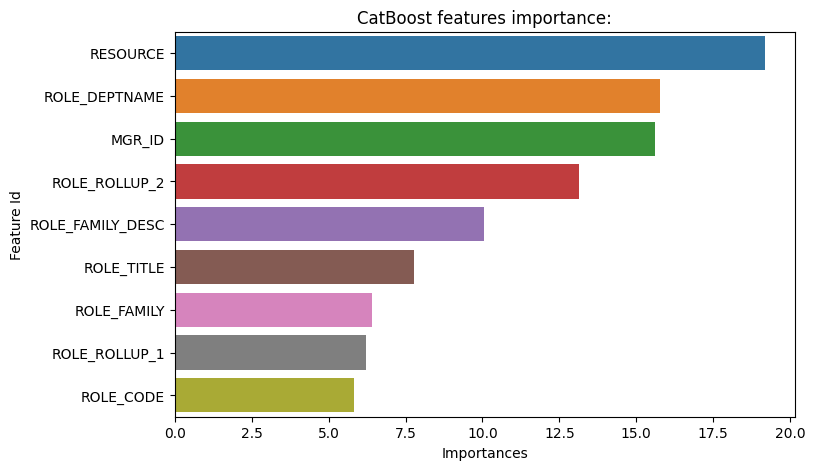

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5));
sns.barplot(x="Importances", y="Feature Id", data=feature_imp);
plt.title('CatBoost features importance:');

In [ ]:
predictions = catmodel.predict_proba(X_test)

In [ ]:
predictions

array([[0.22869066, 0.77130934],
       [0.01378504, 0.98621496],
       [0.00616092, 0.99383908],
       ...,
       [0.00909481, 0.99090519],
       [0.06097107, 0.93902893],
       [0.01370489, 0.98629511]])

In [ ]:
predictions = catmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
catmodel.score(X_valid, y_valid)

0.9571585499816917

In [ ]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<br>

**IMPORTANT**

Note that our target column (**ACTION**) contains **30872** 1s and only **1897** 0s. This is an indication of data imbalance. You can deal with this and use the same steps above to build the algorithm.

If you are not familiar with how to deal with **data imbalance**, watch the **Credit Card Fraud Detection** project video to get to know how to solve this.

<br>
<br>

## Alternatively

Consider building a **Logistic Regression** on same dataset to compare the results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder